#Problem Statment

the problem statment is to predict the customer gets the credit card or not based on his data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_a=pd.read_csv('/content/application_record.csv')
df_c=pd.read_csv('/content/credit_record.csv')

In [ ]:
df_a

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
df_c

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
df_c.replace(['X','C'], 0,inplace=True)

In [ ]:
df_c.STATUS = pd.to_numeric(df_c.STATUS)


In [ ]:
df_c.drop_duplicates(inplace=True)

In [ ]:
df_c

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [ ]:
drop_ls = []
for i in range(len(df_c)):
    if df_c.STATUS[i] != 0:
        drop_ls.append(df_c.ID[i])

In [ ]:
for i in range(len(df_c)):
        if df_c.ID[i] in drop_ls:
            df_c.STATUS[i] = 1

In [ ]:
df_c.STATUS.value_counts()

0    904764
1    143811
Name: STATUS, dtype: int64

In [ ]:
df = df_a.merge(df_c, how='inner', on=['ID'])

In [ ]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,1
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,1


In [ ]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df.drop(['ID'],inplace=True,axis=1)

In [ ]:
df.duplicated().sum()

412393

In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,1
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,1
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,1
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,1
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,1
777711,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,1
777712,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,1


In [ ]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
count,365322.000000,3.653220e+05,365322.000000,365322.000000,365322.0,365322.000000,365322.000000,365322.000000,365322.00000,365322.000000,365322.000000
mean,0.425742,1.848982e+05,-16161.482656,60776.306365,1.0,0.221878,0.294214,0.089595,2.19825,-21.695310,0.203226
std,0.768540,1.017316e+05,4144.182785,139028.719425,0.0,0.415510,0.455689,0.285601,0.92849,15.016078,0.402400
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.00000,-60.000000,0.000000
25%,0.000000,1.170000e+05,-19614.000000,-3208.000000,1.0,0.000000,0.000000,0.000000,2.00000,-33.000000,0.000000
50%,0.000000,1.575000e+05,-15849.000000,-1566.000000,1.0,0.000000,0.000000,0.000000,2.00000,-20.000000,0.000000
75%,1.000000,2.250000e+05,-12676.000000,-378.000000,1.0,0.000000,1.000000,0.000000,3.00000,-9.000000,0.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.00000,0.000000,1.000000


In [ ]:
df.isnull().sum()

CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        113130
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [ ]:
df.OCCUPATION_TYPE


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
777710    Laborers
777711    Laborers
777712    Laborers
777713    Laborers
777714    Laborers
Name: OCCUPATION_TYPE, Length: 365322, dtype: object

In [ ]:
df.OCCUPATION_TYPE.value_counts()


Laborers                 62839
Core staff               34175
Sales staff              33786
Managers                 31066
Drivers                  23349
High skill tech staff    14459
Medicine staff           11937
Accountants              11926
Security staff            6851
Cooking staff             6663
Cleaning staff            5201
Private service staff     2989
Low-skill Laborers        2000
Secretaries               1523
Waiters/barmen staff      1272
HR staff                   973
IT staff                   617
Realty agents              566
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
df.OCCUPATION_TYPE.replace(np.nan, 'Other', inplace = True)


In [ ]:
df.OCCUPATION_TYPE.value_counts()

Other                    113130
Laborers                  62839
Core staff                34175
Sales staff               33786
Managers                  31066
Drivers                   23349
High skill tech staff     14459
Medicine staff            11937
Accountants               11926
Security staff             6851
Cooking staff              6663
Cleaning staff             5201
Private service staff      2989
Low-skill Laborers         2000
Secretaries                1523
Waiters/barmen staff       1272
HR staff                    973
IT staff                    617
Realty agents               566
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
# loop through each column in the dataset
for col in df.columns:
    # check if the column is of object type (categorical)
    if df[col].dtype == 'object':
        # create an empty dictionary to store the mapping
        mapping = {}
        # loop through each unique category in the column
        for category in df[col].unique():
            # check if the category is not already in the mapping
            if category not in mapping:
                # add the category to the mapping and assign an integer value
                mapping[category] = len(mapping)
        # replace the original categorical column with the encoded values
        for category, value in mapping.items():
            df[col] = df[col].replace(category, value)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365322 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          365322 non-null  int64  
 1   FLAG_OWN_CAR         365322 non-null  int64  
 2   FLAG_OWN_REALTY      365322 non-null  int64  
 3   CNT_CHILDREN         365322 non-null  int64  
 4   AMT_INCOME_TOTAL     365322 non-null  float64
 5   NAME_INCOME_TYPE     365322 non-null  int64  
 6   NAME_EDUCATION_TYPE  365322 non-null  int64  
 7   NAME_FAMILY_STATUS   365322 non-null  int64  
 8   NAME_HOUSING_TYPE    365322 non-null  int64  
 9   DAYS_BIRTH           365322 non-null  int64  
 10  DAYS_EMPLOYED        365322 non-null  int64  
 11  FLAG_MOBIL           365322 non-null  int64  
 12  FLAG_WORK_PHONE      365322 non-null  int64  
 13  FLAG_PHONE           365322 non-null  int64  
 14  FLAG_EMAIL           365322 non-null  int64  
 15  OCCUPATION_TYPE  

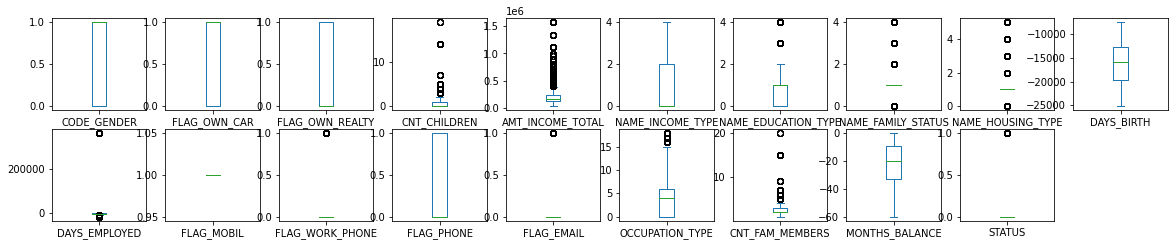

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout=(10,10),figsize=(20,20))
plt.show()

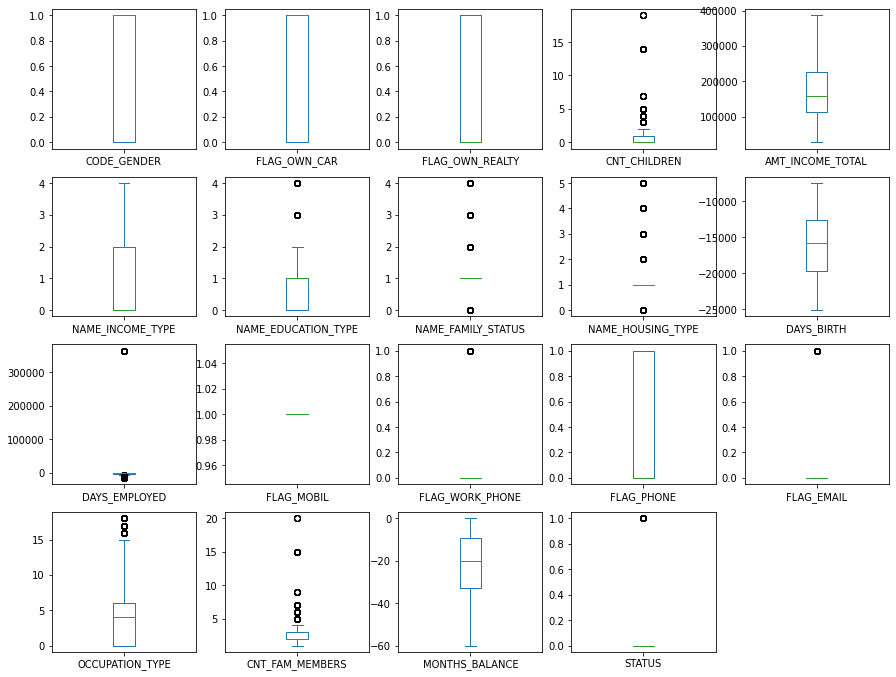

In [ ]:
Q1 = df.AMT_INCOME_TOTAL.quantile(0.25)
Q3 = df.AMT_INCOME_TOTAL.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df.drop(df.loc[df['AMT_INCOME_TOTAL'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['AMT_INCOME_TOTAL'] < (Q1 - 1.5 * IQR)].index)
df_cleaned.plot(kind='box',subplots=True,layout=(6,5),figsize=(15,18))
plt.show()

In [ ]:
df_cleaned.corr()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
CODE_GENDER,1.000000,0.368436,-0.058230,-0.082797,-0.231054,0.154076,-0.026695,0.123664,-0.047591,-0.190395,0.167450,NaN,-0.061106,0.019097,0.004475,-0.032392,-0.115089,-0.024627,-0.007808
FLAG_OWN_CAR,0.368436,1.000000,-0.018308,-0.097546,-0.223222,0.093234,0.069980,0.133098,-0.023110,-0.150038,0.143249,NaN,-0.025600,0.001927,-0.021569,-0.042740,-0.149201,0.008619,0.004206
FLAG_OWN_REALTY,-0.058230,-0.018308,1.000000,0.007110,-0.023161,-0.053183,-0.005182,-0.015340,0.157639,0.136972,-0.092560,NaN,0.194021,0.055240,-0.052274,0.029768,0.004598,0.007514,0.026881
CNT_CHILDREN,-0.082797,-0.097546,0.007110,1.000000,0.034015,-0.127414,-0.021563,-0.112356,0.031414,0.340926,-0.227126,NaN,0.047695,-0.021047,0.003256,0.112570,0.892739,0.004083,0.015706
AMT_INCOME_TOTAL,-0.231054,-0.223222,-0.023161,0.034015,1.000000,-0.043021,-0.165642,-0.005510,-0.000550,0.122123,-0.195353,NaN,-0.033697,0.000439,0.078896,0.088333,0.024924,-0.012159,0.018171
NAME_INCOME_TYPE,0.154076,0.093234,-0.053183,-0.127414,-0.043021,1.000000,-0.047196,0.072215,-0.012467,-0.345627,0.547942,NaN,-0.178102,-0.025590,-0.029962,-0.187893,-0.118776,-0.009553,-0.011857
NAME_EDUCATION_TYPE,-0.026695,0.069980,-0.005182,-0.021563,-0.165642,-0.047196,1.000000,-0.001829,-0.002899,-0.068372,0.075490,NaN,0.015159,-0.009361,-0.070388,-0.041576,-0.016620,0.007898,-0.000410
NAME_FAMILY_STATUS,0.123664,0.133098,-0.015340,-0.112356,-0.005510,0.072215,-0.001829,1.000000,-0.002433,-0.175807,0.144857,NaN,-0.062144,-0.000435,0.001138,-0.055752,-0.473552,0.005882,-0.002933
NAME_HOUSING_TYPE,-0.047591,-0.023110,0.157639,0.031414,-0.000550,-0.012467,-0.002899,-0.002433,1.000000,0.141760,-0.079328,NaN,0.019315,-0.004486,-0.003427,0.055427,0.010491,0.010366,0.010008
DAYS_BIRTH,-0.190395,-0.150038,0.136972,0.340926,0.122123,-0.345627,-0.068372,-0.175807,0.141760,1.000000,-0.615969,NaN,0.184272,-0.021827,0.104741,0.280163,0.307197,0.047822,0.037988


In [ ]:
df_cleaned.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [ ]:
df_cleaned

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
31,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,0,0
32,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,-1,0
33,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,-2,0
34,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,-3,0
35,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,1,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,0,1,0,0,112500.0,0,1,2,0,-9188,-1193,1,0,0,0,4,1.0,-9,1
777711,0,1,0,0,112500.0,0,1,2,0,-9188,-1193,1,0,0,0,4,1.0,-10,1
777712,0,1,0,0,112500.0,0,1,2,0,-9188,-1193,1,0,0,0,4,1.0,-11,1
777713,0,1,0,0,112500.0,0,1,2,0,-9188,-1193,1,0,0,0,4,1.0,-12,1


In [ ]:
df_cleaned=df_cleaned.drop('FLAG_MOBIL',axis=True)

array([[<Axes: title={'center': 'CODE_GENDER'}>,
        <Axes: title={'center': 'FLAG_OWN_CAR'}>,
        <Axes: title={'center': 'FLAG_OWN_REALTY'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>],
       [<Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'NAME_INCOME_TYPE'}>,
        <Axes: title={'center': 'NAME_EDUCATION_TYPE'}>,
        <Axes: title={'center': 'NAME_FAMILY_STATUS'}>],
       [<Axes: title={'center': 'NAME_HOUSING_TYPE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>],
       [<Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'OCCUPATION_TYPE'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>],
       [<Axes: title={'center': 'MONTHS_BALANCE'}>,
        <Axes: title={'center': 'STATUS'}>, <Axes: >, <Axes: >]],
      dtype=object)

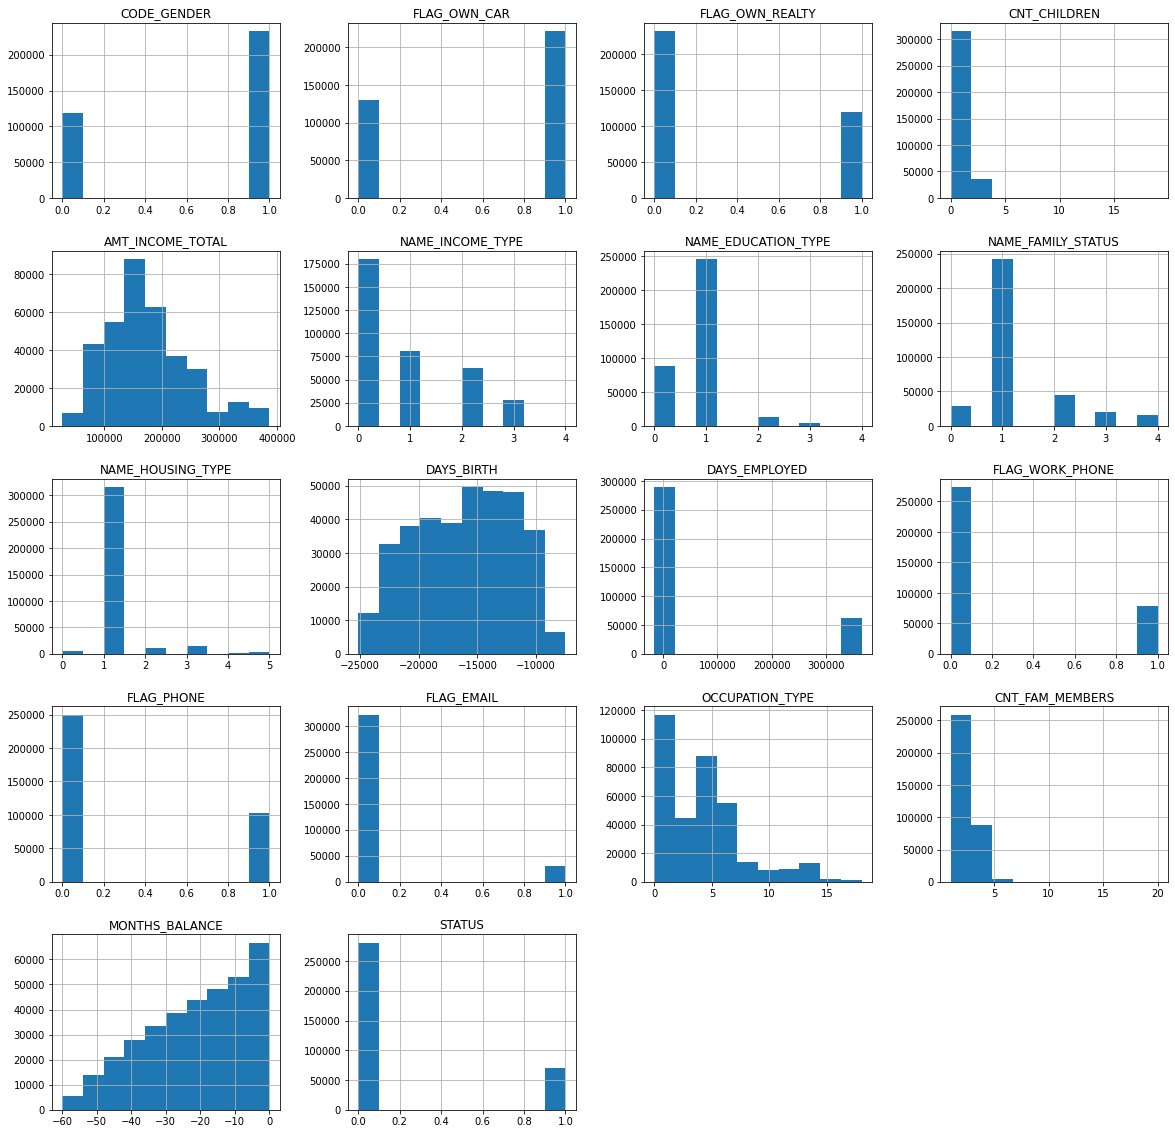

In [ ]:
df_cleaned.hist(figsize=(20,20))

<Axes: >

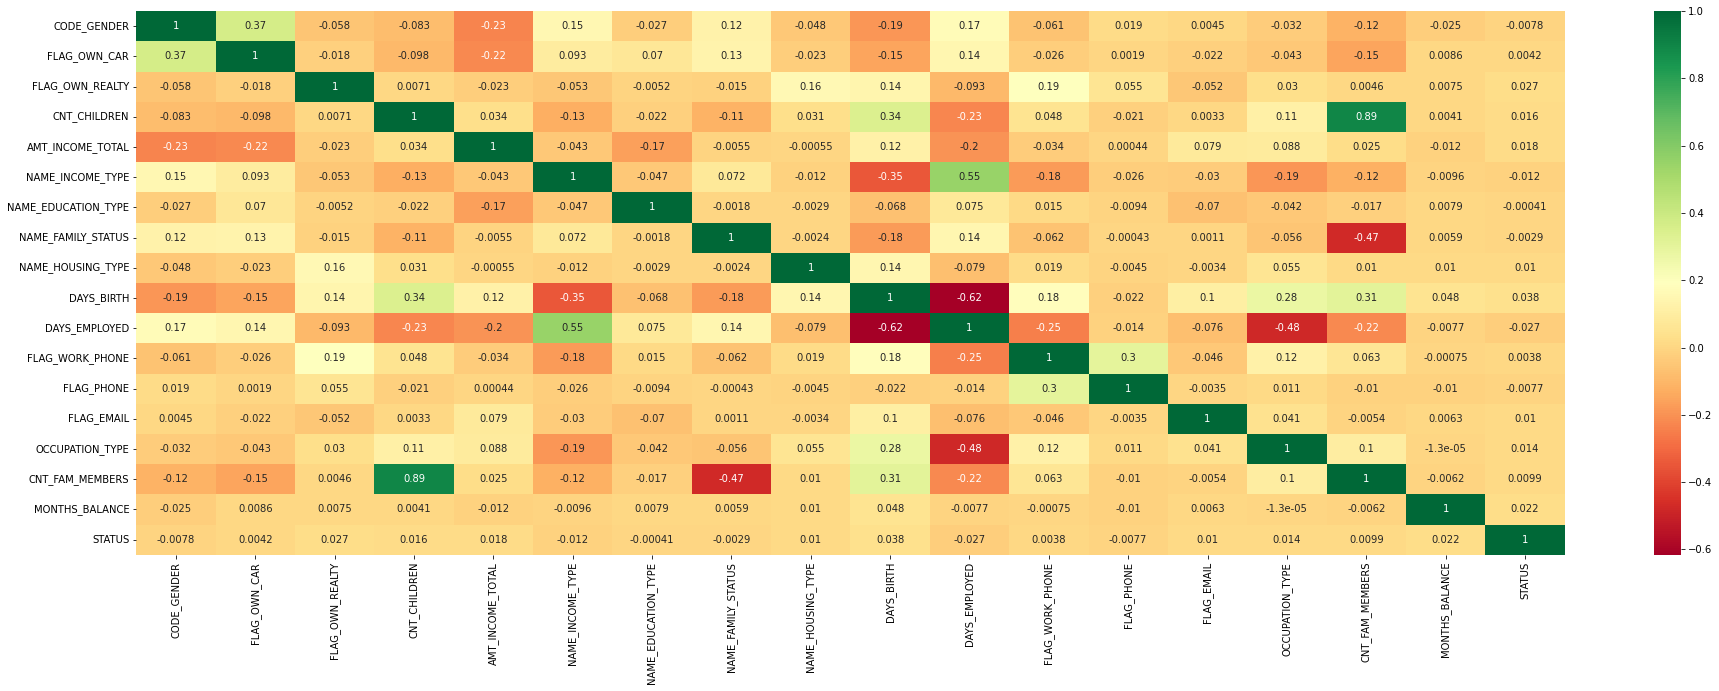

In [ ]:
import seaborn as sns
plt.figure(figsize=(32,10))
sns.heatmap(df_cleaned.corr(),annot=True,cmap='RdYlGn')

In [ ]:
# normalization by using minmax normalization
min_vals = np.min(df, axis=0)
max_vals = np.max(df, axis=0)
scaled_data = (df_cleaned - min_vals) / (max_vals - min_vals)


In [ ]:
scaled_data

,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMAIL,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,MONTHS_BALANCE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,STATUS
31,0.055233,0.0,0.052632,0.0,0.208232,0.038270,0.0,NaN,0.0,0.0,0.0,0.0,1.000000,0.25,0.25,0.2,0.0,0.055556,0.0
32,0.055233,0.0,0.052632,0.0,0.208232,0.038270,0.0,NaN,0.0,0.0,0.0,0.0,0.983333,0.25,0.25,0.2,0.0,0.055556,0.0
33,0.055233,0.0,0.052632,0.0,0.208232,0.038270,0.0,NaN,0.0,0.0,0.0,0.0,0.966667,0.25,0.25,0.2,0.0,0.055556,0.0
34,0.055233,0.0,0.052632,0.0,0.208232,0.038270,0.0,NaN,0.0,0.0,0.0,0.0,0.950000,0.25,0.25,0.2,0.0,0.055556,0.0
35,0.055233,0.0,0.052632,0.0,0.208232,0.038270,0.0,NaN,0.0,0.0,0.0,0.0,0.933333,0.25,0.25,0.2,0.0,0.055556,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,0.055233,0.0,0.000000,0.0,0.903810,0.038115,0.0,NaN,1.0,0.0,0.0,0.0,0.850000,0.25,0.50,0.0,0.0,0.222222,1.0
777711,0.055233,0.0,0.000000,0.0,0.903810,0.038115,0.0,NaN,1.0,0.0,0.0,0.0,0.833333,0.25,0.50,0.0,0.0,0.222222,1.0
777712,0.055233,0.0,0.000000,0.0,0.903810,0.038115,0.0,NaN,1.0,0.0,0.0,0.0,0.816667,0.25,0.50,0.0,0.0,0.222222,1.0
777713,0.055233,0.0,0.000000,0.0,0.903810,0.038115,0.0,NaN,1.0,0.0,0.0,0.0,0.800000,0.25,0.50,0.0,0.0,0.222222,1.0


In [ ]:



# Shuffle your dataset 
shuffle_df = scaled_data.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(scaled_data))



# Split your dataset 
train_set = scaled_data[:train_size]
test_set = scaled_data[train_size:]



In [ ]:
train_set

,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMAIL,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,MONTHS_BALANCE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,STATUS
31,0.055233,0.0,0.052632,0.0,0.208232,0.038270,0.0,NaN,0.0,0.0,0.0,0.0,1.000000,0.25,0.25,0.2,0.0,0.055556,0.0
32,0.055233,0.0,0.052632,0.0,0.208232,0.038270,0.0,NaN,0.0,0.0,0.0,0.0,0.983333,0.25,0.25,0.2,0.0,0.055556,0.0
33,0.055233,0.0,0.052632,0.0,0.208232,0.038270,0.0,NaN,0.0,0.0,0.0,0.0,0.966667,0.25,0.25,0.2,0.0,0.055556,0.0
34,0.055233,0.0,0.052632,0.0,0.208232,0.038270,0.0,NaN,0.0,0.0,0.0,0.0,0.950000,0.25,0.25,0.2,0.0,0.055556,0.0
35,0.055233,0.0,0.052632,0.0,0.208232,0.038270,0.0,NaN,0.0,0.0,0.0,0.0,0.933333,0.25,0.25,0.2,0.0,0.055556,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620162,0.069767,0.0,0.052632,0.0,0.304139,0.022617,0.0,NaN,1.0,0.0,0.0,0.0,0.550000,0.00,0.25,0.2,0.0,0.222222,0.0
620163,0.069767,0.0,0.052632,0.0,0.304139,0.022617,0.0,NaN,1.0,0.0,0.0,0.0,0.533333,0.00,0.25,0.2,0.0,0.222222,0.0
620164,0.069767,0.0,0.052632,0.0,0.304139,0.022617,0.0,NaN,1.0,0.0,0.0,0.0,0.516667,0.00,0.25,0.2,0.0,0.222222,0.0
620165,0.069767,0.0,0.052632,0.0,0.304139,0.022617,0.0,NaN,1.0,0.0,0.0,0.0,0.500000,0.00,0.25,0.2,0.0,0.222222,0.0


In [ ]:
test_set

,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_EMAIL,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,MONTHS_BALANCE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,STATUS
620167,0.069767,0.0,0.052632,0.0,0.304139,0.022617,0.0,NaN,1.0,0.0,0.0,0.0,0.466667,0.00,0.25,0.2,0.0,0.222222,0.0
620168,0.069767,0.0,0.052632,0.0,0.304139,0.022617,0.0,NaN,1.0,0.0,0.0,0.0,0.450000,0.00,0.25,0.2,0.0,0.222222,0.0
620169,0.069767,0.0,0.052632,0.0,0.304139,0.022617,0.0,NaN,1.0,0.0,0.0,0.0,0.433333,0.00,0.25,0.2,0.0,0.222222,0.0
620170,0.069767,0.0,0.052632,0.0,0.304139,0.022617,0.0,NaN,1.0,0.0,0.0,0.0,0.416667,0.00,0.25,0.2,0.0,0.222222,0.0
620188,0.055233,0.0,0.052632,0.0,0.259412,1.000000,0.0,NaN,0.0,1.0,0.0,0.0,1.000000,0.25,0.25,0.2,0.5,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,0.055233,0.0,0.000000,0.0,0.903810,0.038115,0.0,NaN,1.0,0.0,0.0,0.0,0.850000,0.25,0.50,0.0,0.0,0.222222,1.0
777711,0.055233,0.0,0.000000,0.0,0.903810,0.038115,0.0,NaN,1.0,0.0,0.0,0.0,0.833333,0.25,0.50,0.0,0.0,0.222222,1.0
777712,0.055233,0.0,0.000000,0.0,0.903810,0.038115,0.0,NaN,1.0,0.0,0.0,0.0,0.816667,0.25,0.50,0.0,0.0,0.222222,1.0
777713,0.055233,0.0,0.000000,0.0,0.903810,0.038115,0.0,NaN,1.0,0.0,0.0,0.0,0.800000,0.25,0.50,0.0,0.0,0.222222,1.0


In [ ]:
import random
np.random.seed(42)
class NeuralNetwork:

    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
      #activation function  
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
      # Forward Propogtion
    def forward(self, X):
      
        # Calculate hidden layer activation
        
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Calculate output layer activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
        #Backward Propogation
    def backward(self, X, y, output):
        # Calculate error at output layer
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        
        # Calculate error at hidden layer
        self.hidden_error = np.dot(self.output_delta, self.W2.T)
        self.hidden_delta = self.hidden_error * self.sigmoid_derivative(self.a1)
        
        # Update weights and biases
        self.W2 += self.learning_rate * np.dot(self.a1.T, self.output_delta)
        self.b2 += self.learning_rate * np.sum(self.output_delta, axis=0, keepdims=True)
        self.W1 += self.learning_rate * np.dot(X.T, self.hidden_delta)
        self.b1 += self.learning_rate * np.sum(self.hidden_delta, axis=0)
    
    def train(self, X, y, epochs):
            output = self.forward(X)
            self.backward(X, y, output)
           
    def predict(self, X):
        return np.round(self.forward(X))
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

# Define training and testing sets
train_set = np.random.randn(100, 18)
test_set = np.random.randint(0, 2, size=(100, 1))


# Create a neural network with  inputs, 10 hidden units, and 1 output
nn = NeuralNetwork(input_size=18, hidden_size=10, output_size=10)

# Train the neural network on the training set for 10 epochs
nn.train(train_set, test_set, epochs=10)
# Evaluate the accuracy of the trained model on the testing set
accuracy = nn.evaluate(train_set, test_set)
print("Testing accuracy:", accuracy)




Testing accuracy: 0.504


In [ ]:

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense



# Split the data into training and test sets
train_data, test_data, train_target, test_target = train_test_split(
    df.drop(columns=["STATUS"]), df["STATUS"], test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential()
model.add(Dense(18, input_dim=train_data.shape[1], activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(train_data, train_target, epochs=10, batch_size=10, verbose=0)

# Evaluate the model's accuracy on the train data
train_loss, train_accuracy = model.evaluate(train_data, train_target, verbose=0)
print("Train Accuracy:", train_accuracy)

# Evaluate the model's accuracy on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_target, verbose=0)
print("Test Accuracy:", test_accuracy)



Train Accuracy: 0.7966516017913818
Test Accuracy: 0.7972627282142639
